
#  Dimensionality Reduction Exercise

## Dataset: Human Activity Recognition Using Smartphones

This dataset contains sensor signals collected from smartphones worn by subjects performing various activities. It includes:

- **561 features** extracted from accelerometer and gyroscope signals.
- **6 activity labels**: Walking, Walking Upstairs, Walking Downstairs, Sitting, Standing, Laying.
- The goal is to **predict the activity label** from sensor data, making this a **supervised learning** problem.

📂 Dataset link: [UCI Repository – HAR Dataset](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones)


## STEPS

### Step 1: Data Loading and Preprocessing
Loas the Human Activity Recognition dataset and standardized the features using `StandardScaler`. This ensures that all features contribute equally to the dimensionality reduction process.

### Step 2: PCA Projection
Apply **Principal Component Analysis** (PCA) to reduce the data to 2 dimensions. Plots the resulting clusters.

### Step 3: t-SNE Projection
Apply **t-SNE** to the same standardized data and  visualize the resulting clusters.

### Step 4: LDA Projection
Apply  **Linear Discriminant Analysis** (LDA), a supervised method that uses class labels to maximize class separability.

### Step 5: Feature Selection with SelectKBest
Use **SelectKBest** to select the top features based on ANOVA F-value. This filter method is fast and interpretable but does not consider feature interactions. The selected features can be used to train simpler models with reduced dimensionality.

### Step 6: Feature Selection with RFE
Apply **Recursive Feature Elimination** (RFE) using Logistic Regression to identify the most informative features. RFE is a wrapper method that recursively removes the least important features and considers feature interactions. It is more computationally expensive but can improve model performance.

### Step 7: Random Forest Classification
We trained a Random Forest classifier on the PCA-reduced and LDA-reduced data. The confusion matrices and accuracy scores show that LDA-reduced data yields better classification performance than PCA-reduced data. This confirms that LDA is more effective for supervised tasks where class labels are available.

### Step 8: Interpretaion and comparaison
Compare the different reduction methods according to the visualaization plots and the understanding class separability.

### Step 9:
Apply Random Forest classification on two reduced data sets selected in the comparaison step.

## Step 1: Load and Preprocess the Data

In [1]:
#céer une connection avec google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn import preprocessing
# Load the dataset (assumes files are available locally)
X = pd.read_csv('/content/X_train.txt', delim_whitespace=True, header=None)
y = pd.read_csv('/content/y_train.txt', delim_whitespace=True, header=None).values.ravel()

# Standardize the features
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)


/tmp/ipython-input-2188297879.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv('/content/X_train.txt', delim_whitespace=True, header=None)
/tmp/ipython-input-2188297879.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y = pd.read_csv('/content/y_train.txt', delim_whitespace=True, header=None).values.ravel()


In [3]:
#import librarires
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

## Step 2: Apply PCA

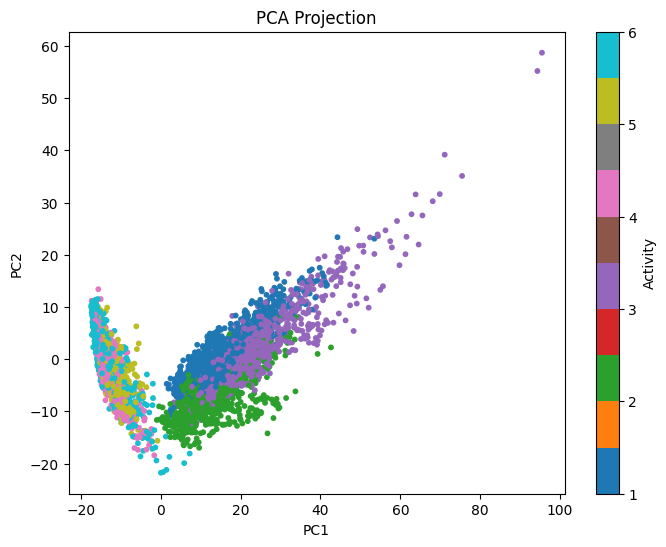

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_filled = imputer.fit_transform(X_scaled)

# Make y match the rows in X_filled (if rows were dropped, otherwise just copy)
y_filled = y[:X_filled.shape[0]]  # or use a mask if dropping rows

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_filled)

# Visualize
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_filled, cmap='tab10', s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.colorbar(label='Activity')
plt.show()


## Step 3: Apply t-SNE

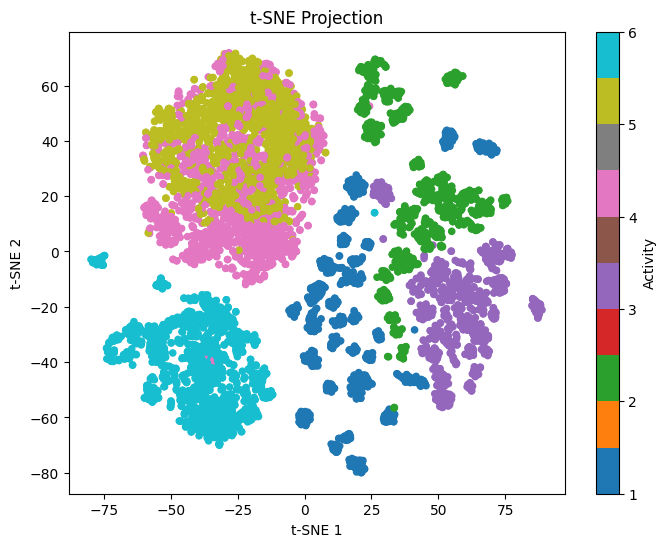

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_filled = imputer.fit_transform(X)

# Make y match X_filled (if rows were dropped, otherwise just copy)
y_filled = y[:X_filled.shape[0]]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_filled)

# Visualize
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_filled, cmap='tab10', s=20)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Projection')
plt.colorbar(label='Activity')
plt.show()


## Step 4: Apply Linear Discriminant Analysis (LDA)

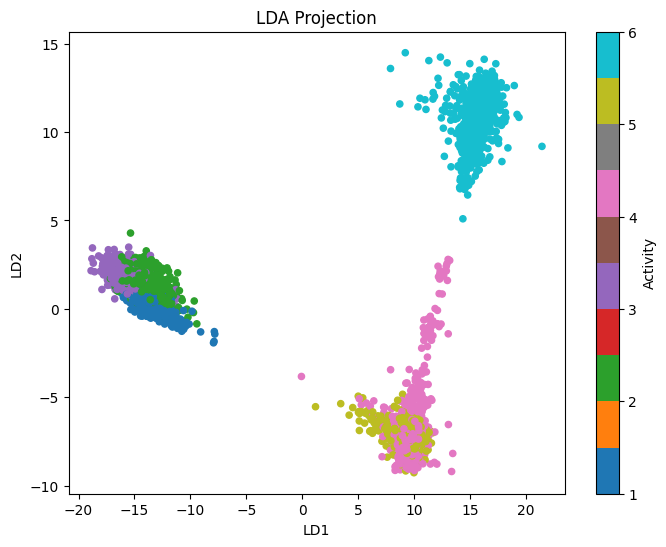

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np

# If X had NaNs and you want to drop rows with NaNs:
mask = ~np.isnan(X).any(axis=1)
X_clean = X[mask]
y_clean = y[mask]

# Or if you imputed, just use all rows (ensure lengths match)
imputer = SimpleImputer(strategy='mean')
X_filled = imputer.fit_transform(X_clean)  # X_clean has same rows as y_clean

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_filled, y_clean)

# Visualize
plt.figure(figsize=(8,6))
plt.scatter(X_lda[:,0], X_lda[:,1], c=y_clean, cmap='tab10', s=20)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA Projection')
plt.colorbar(label='Activity')
plt.show()


## Step 5: Apply SelectKBest (Filter Method)

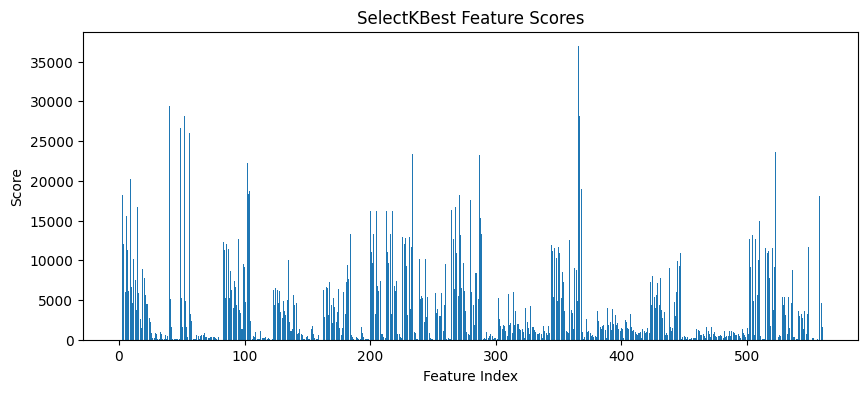

Selected features: [ 40  49  52 366 367]


In [7]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import numpy as np

# Apply SelectKBest (choose top 5 features)
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Visualize feature scores
scores = selector.scores_
plt.figure(figsize=(10,4))
plt.bar(range(len(scores)), scores)
plt.xlabel('Feature Index')
plt.ylabel('Score')
plt.title('SelectKBest Feature Scores')
plt.show()

# Selected feature indices
selected_indices = np.where(selector.get_support())[0]
print("Selected features:", selected_indices)


## Step 6: Apply Recursive Feature Elimination (Wrapper Method)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Apply RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=5)  # select top 5 features
X_rfe = rfe.fit_transform(X, y)

# Visualize ranking of features
plt.figure(figsize=(10,4))
plt.bar(range(len(rfe.ranking_)), rfe.ranking_)
plt.xlabel('Feature Index')
plt.ylabel('Ranking')
plt.title('RFE Feature Ranking')
plt.show()

# Selected features
selected_indices = np.where(rfe.support_)[0]
print("Selected features:", selected_indices)



## Interpretation and Comparison

- **PCA**: ...
- **t-SNE**: ...
- **LDA**: ...
- **SelectKBest**: ...
- **RFE**: ...

### Conclusion
For visualization and understanding class separability,....


**Interpretation and Comparison**
PCA: Unsupervised, reduces dimensions by saving maximum variance. Good overall compressing data or visualizing approximately. Classes might intermingle.
t-SNE: Unsupervised, preserve local structure and local clusters in 2D/3D. Good for visualizing complex, non-linear patterns.
LDA: Supervised, reduces dimensions by maximizing class separation. Good if you want neat separation of class.
SelectKBest: A supervised feature selection method. Selects the best features based on scoring. Good for both model performance and interpretability purposes.
RFE: A supervised feature selection method where the least significant features are introduced recursively with a model. Ideal of applying a supervised model for selection.


**For visualizing and interpreting class separability:**

LDA and t-SNE are the best for clustering or visualization of class separability. PCA is simple but would not separate classes individually per se.
SelectKBest and RFE for the moment - would select the most significant features to model, they would not directly visualize the data.

### Step 9:
Apply Random Forest classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize classifiers
rf_pca = RandomForestClassifier(random_state=42)
rf_lda = RandomForestClassifier(random_state=42)
rf_selectk = RandomForestClassifier(random_state=42)
rf_rfe = RandomForestClassifier(random_state=42)

# Train on different feature sets
rf_pca.fit(X_pca, y)
rf_lda.fit(X_lda, y)
rf_selectk.fit(X_new, y)  # X_new from SelectKBest
rf_rfe.fit(X_rfe, y)      # X_rfe from RFE

# Predict
y_pred_pca = rf_pca.predict(X_pca)
y_pred_lda = rf_lda.predict(X_lda)
y_pred_selectk = rf_selectk.predict(X_new)
y_pred_rfe = rf_rfe.predict(X_rfe)

# Accuracy
print("Accuracy PCA:", accuracy_score(y, y_pred_pca))
print("Accuracy LDA:", accuracy_score(y, y_pred_lda))
print("Accuracy SelectKBest:", accuracy_score(y, y_pred_selectk))
print("Accuracy RFE:", accuracy_score(y, y_pred_rfe))

# Confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12,10))
ConfusionMatrixDisplay.from_predictions(y, y_pred_pca, ax=axes[0,0], cmap='Blues')
axes[0,0].set_title('Random Forest on PCA')

ConfusionMatrixDisplay.from_predictions(y, y_pred_lda, ax=axes[0,1], cmap='Blues')
axes[0,1].set_title('Random Forest on LDA')

ConfusionMatrixDisplay.from_predictions(y, y_pred_selectk, ax=axes[1,0], cmap='Blues')
axes[1,0].set_title('Random Forest on SelectKBest')

ConfusionMatrixDisplay.from_predictions(y, y_pred_rfe, ax=axes[1,1], cmap='Blues')
axes[1,1].set_title('Random Forest on RFE')

plt.tight_layout()
plt.show()


## Additional tests